<a href="https://colab.research.google.com/github/manikcb/all-my-assignments/blob/main/svm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt

In [64]:
df = pd.read_csv(r"/content/DATABASE-KERATOCONUS.csv")

In [65]:
df = df.drop(['K1 Eje','FECHA','Ojo', 'Grado QC','AVSC'],
             axis=1) 

In [24]:
df.dtypes

ID                        int64
Edad                      int64
Sexo                     object
Esfera                  float64
Cilindro                float64
Eje                     float64
AVCC                    float64
EQ. ESF                 float64
K1                      float64
K1 Eje                  float64
K2                      float64
K2 Eje                  float64
Km                      float64
KMAX                    float64
Q                       float64
IVA                     float64
K1.1                    float64
K1 Eje.1                float64
K2.1                    float64
K2 Eje.1                float64
Km.1                    float64
Q.1                     float64
ECC                       int64
ECMin                     int64
X ECMin                 float64
Y ECMin                 float64
RMS Total               float64
RMS HOA                 float64
Astigm 2º CORNEA 0º     float64
Astigm 2º CORNEA 45º    float64
COMA ANT 0              float64
COMA POS

In [66]:
df=pd.get_dummies(df, columns=['Sexo'])

In [67]:
df.head(10)

,ID,Edad,Esfera,Cilindro,Eje,AVCC,EQ. ESF,K1,K2,K2 Eje,...,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0º,TREFOIL 30º,TETRAFOIL 0º,"TETRAFOIL 22,5º",ABERR. ESF,Sexo_H,Sexo_M
0,1001,24,-5.50,-1.50,30.0,1.0,-6.0,42.6,44.6,126.7,...,-0.362,-0.027,-0.429,0.110,0.038,-0.035,0.122,0.253,1,0
1,1002,24,-4.75,-2.75,170.0,1.0,-6.0,42.0,45.1,75.8,...,-0.126,-0.055,0.191,0.080,-0.047,-0.029,-0.047,0.201,1,0
2,1003,20,1.00,-6.00,5.0,0.8,-2.0,41.7,48.3,91.9,...,0.114,-0.026,0.113,-0.091,-0.037,-0.292,0.035,-0.085,1,0
3,1004,20,1.00,-6.00,170.0,0.9,-2.0,41.5,48.1,79.5,...,0.040,-0.065,-0.006,0.093,0.190,-0.165,0.040,-0.068,1,0
4,1005,23,NaN,NaN,NaN,1.0,NaN,41.9,42.9,97.5,...,-0.127,0.024,-0.129,0.050,0.158,-0.104,-0.138,0.131,0,1
5,1006,23,-2.00,-3.00,150.0,1.0,-3.5,41.3,43.9,62.6,...,-0.052,0.012,-0.042,0.068,-0.055,-0.040,0.013,0.105,0,1
6,1007,68,1.50,-3.00,115.0,1.0,NaN,44.4,45.7,26.8,...,0.053,-0.022,0.045,0.056,-0.050,-0.077,-0.080,0.242,0,1
7,1008,68,1.00,-4.50,70.0,1.0,-1.0,43.2,47.7,162.6,...,0.013,0.018,0.047,0.200,0.085,-0.054,-0.097,0.459,0,1
8,1009,60,1.00,-3.00,115.0,1.0,NaN,44.5,45.0,25.0,...,0.054,-0.040,0.045,0.056,-0.006,0.092,-0.018,0.249,0,1
9,1010,60,1.50,-4.50,70.0,1.0,-1.0,43.0,47.0,171.0,...,0.012,0.016,0.047,0.200,-0.097,-0.074,-0.091,0.440,0,1


In [87]:
X=df.drop(columns=['Sexo_H','Sexo_M','Esfera','Cilindro','Eje','EQ. ESF'])
y = df['Sexo_H']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
print(len(X_train))
print(len(X_test))

143
62


In [90]:
model = SVC(kernel='linear')

In [52]:
X.dtypes

ID                        int64
Edad                      int64
AVCC                    float64
K1                      float64
K1 Eje                  float64
K2                      float64
K2 Eje                  float64
Km                      float64
KMAX                    float64
Q                       float64
IVA                     float64
K1.1                    float64
K1 Eje.1                float64
K2.1                    float64
K2 Eje.1                float64
Km.1                    float64
Q.1                     float64
ECC                       int64
ECMin                     int64
X ECMin                 float64
Y ECMin                 float64
RMS Total               float64
RMS HOA                 float64
Astigm 2º CORNEA 0º     float64
Astigm 2º CORNEA 45º    float64
COMA ANT 0              float64
COMA POST 0             float64
COMA CORNEA 0           float64
COMA ANT 90             float64
COMA POST 90            float64
COMA CORNEA 90          float64
TREFOIL 

In [91]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [92]:
predictions = model.predict(X_test)
print(predictions)

[0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0
 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1]


In [93]:
percentage = model.score(X_test, y_test)

In [94]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[20 15]
 [ 9 18]]
Test Set: 62
Accuracy = 61.29032258064516 %


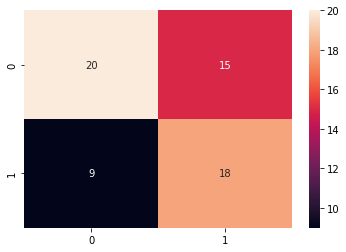

In [95]:
import seaborn as sns
sns.heatmap(res, annot=True)